In [1]:
import numpy as np
import matplotlib.pyplot as plt

from classicalfield_orig import FiniteTempGPE as gpe 

In [4]:
0.005/3

0.0016666666666666668

In [5]:
200/(0.000762939453125/3)

786432.0

In [ ]:
# test out to see if the new potential is good 
g = gpe(npoints = 2**7, numImagSteps = 2000, numRealSteps = 800000, dtcoef = 0.0015, boxthickness = 3, Nsamples = 1, runAnim = True, animFileName = 'dt0015_thick3_long.mp4', Tfact = 1/2, dst = False)

No vortices to be spawned
Total Imag Time:  7.596409559249878
kmax:  8.042477193189871
T:  16.170359850744806


In [3]:
print(g.gpeobj.Vbox.nbytes)

524288


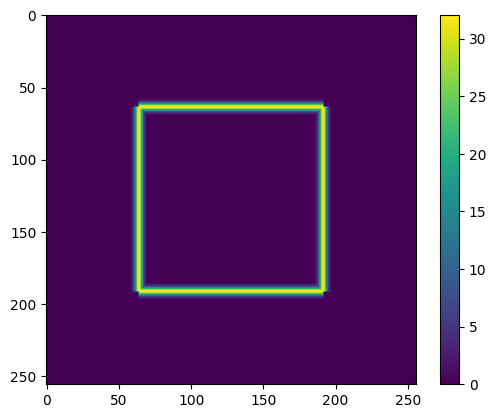

In [4]:
plt.figure() 
plt.imshow(g.gpeobj.Vbox)
plt.colorbar() 

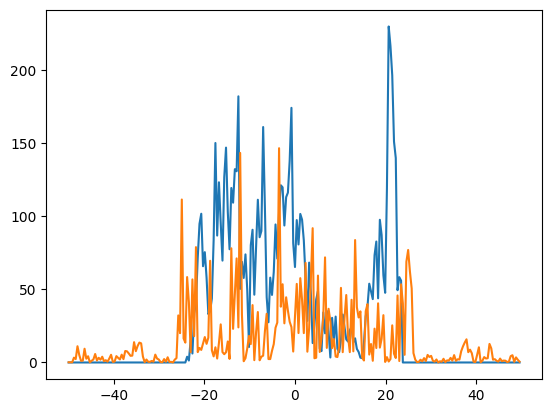

In [8]:
plt.figure() 
plt.plot(g.xi[0][0], np.abs(g.snaps[0][len(g.snaps[0])//2])**2)
plt.plot(g.xi[0][0], np.abs(g.snaps[-1][len(g.snaps[-1])//2])**2)

In [9]:
from scipy.fft import fft2, ifft2, fftshift, ifftshift

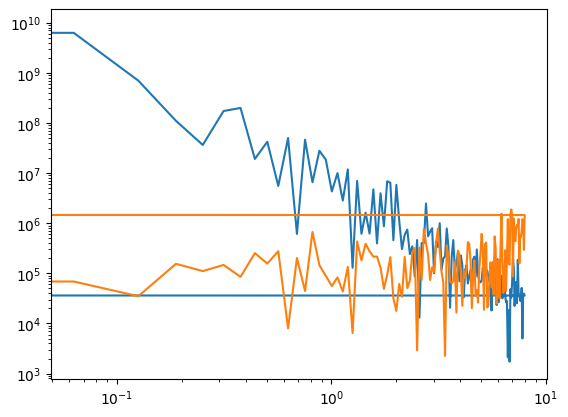

In [14]:
plt.figure() 
plt.plot(g.ki[0][0], np.abs(fft2(g.snaps[0])[0])**2)
plt.plot(g.ki[0][0], np.abs(fft2(g.snaps[-1])[0])**2)
plt.yscale('log')
plt.xscale('log')

In [5]:
# get the energies and stats

print("Temperature: ", g.T) 
print("Kinetic Energy: ", g.gpeobj.kmax**2/2)
print("Potential Energy: ", np.max(g.gpeobj.Vbox))
print("Interaction Energy: ", g.gpeobj.g*np.max(np.abs(g.gs)**2))
print("Total Time: ", g.numRealSteps*g.gpeobj.dt) 
print("Time Step: ", g.gpeobj.dt)
print("Number of Atoms: ", g.gpeobj.Natoms) 

Temperature:  16.170359850744806
Kinetic Energy:  32.34071970148961
Potential Energy:  32.08707218883434
Interaction Energy:  1.2477601514127477
Total Time:  201.416015625
Time Step:  0.000762939453125
Number of Atoms:  128000


In [7]:
print(100/g.gpeobj.dt)

1310720.0


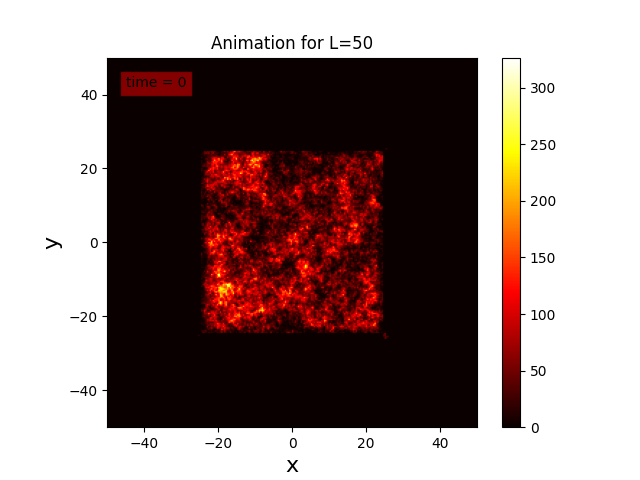

In [3]:
%matplotlib widget 
g.animatepsi2d('test_box.mp4')